In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
year = '2022'
start_month = '09'
end_month = '09'
start_date = '01'
end_date = '05'

df1 = pd.read_csv('../.././data/Demand/CAISO-demand-20220901.csv')

In [100]:
df1.columns.to_numpy()[0][7:]

'09/01/2022'

In [101]:
demand_trend = np.zeros(0)
time_step = np.zeros(0)

In [110]:
import sys
import time
import datetime

def restart_line():
    sys.stdout.flush()
    time.sleep(0.05)
    sys.stdout.write('\r')
    sys.stdout.flush()
    
index = 0
N = 5
    
import os
for root, dirs, files in os.walk(r'/Users/kaiwencheng/Desktop/research/SRIP/carbon_related_data_analytics/power_plant_related/data/Demand'):
    for filename in files:
        if(filename[-4:]!='.csv'):
            continue
        
        sys.stdout.write('Concatinating {}/{}'.format(index,N))
        restart_line()

        index += 1
        time_step2 = pd.read_csv('../.././data/Demand/{}'.format(filename)).columns.to_numpy()[1:-1]
        date = pd.read_csv('../.././data/Demand/{}'.format(filename)).columns.to_numpy()[0][7:]
        
        for i in range(time_step2.shape[0]):
            time_step2[i] = pd.to_datetime(date+' '+time_step2[i])
        
        demand_trend2 = pd.read_csv('../.././data/Demand/{}'.format(filename)).iloc[1].to_numpy()[1:-1]
        
        demand_trend = np.concatenate((demand_trend, demand_trend2), axis=None)
        time_step = np.concatenate((time_step, time_step2), axis=None)



,0
31343.0,2022-09-01 00:00:00
30930.0,2022-09-01 00:05:00
30930.0,2022-09-01 00:10:00
30930.0,2022-09-01 00:15:00
30464.0,2022-09-01 00:20:00
...,...
33196.0,2022-09-04 23:35:00
33196.0,2022-09-04 23:40:00
33196.0,2022-09-04 23:45:00
32594.0,2022-09-04 23:50:00


In [113]:
demand = pd.DataFrame({'time':time_step,'demand':demand_trend})

In [115]:
demand = demand.sort_values('time')

In [116]:
time_step[0]

Timestamp('2022-09-01 00:00:00')

<AxesSubplot:xlabel='time'>

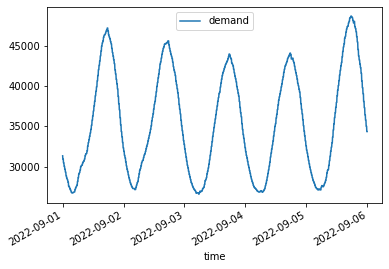

In [118]:
demand.plot(x="time", y=["demand"])